In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(6,3)}, style='whitegrid')
from sklearn.tree import DecisionTreeClassifier # импорт для [27]
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler # импорт для [37]

In [2]:
data = pd.read_csv('pulsar_data_train.txt')

In [3]:
data

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
...,...,...,...,...,...,...,...,...,...
12523,124.312500,53.179053,-0.012418,-0.556021,7.186455,29.308266,4.531382,21.725143,0.0
12524,115.617188,46.784600,0.218177,0.226757,6.140468,NaN,5.732201,34.357283,0.0
12525,116.031250,43.213846,0.663456,0.433088,0.785117,11.628149,17.055215,312.204325,0.0
12526,135.664062,49.933749,-0.089940,-0.226726,3.859532,21.501505,7.398395,62.334018,0.0


#### 1. Прочитайте данные, сделайте беглый EDA - посмотрите на кол-во данных, названия столбцов, нет ли в них ошибок, переименуйте для более удобной работы, есть ли пропущенные значения. Посмотрите нет ли дисбаланса классов по таргету? Сделайте саммари по признакам. Отобразите боксплоты признаков, чтобы оценить выбросы в данных. Постройте гистограммы признаков, чтобы взглянуть на распределение данных.

In [4]:
col_names = ['Mean of the integrated profile', 'Standard deviation of the integrated profile', 'Excess kurtosis of the integrated profile', 'Skewness of the integrated profile', 'Mean of the DM-SNR curve', 'Standard deviation of the DM-SNR curve', 'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve', 'target_class']
data.columns = col_names
data.columns

Index(['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [5]:
data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


In [6]:
data.shape

(12528, 9)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Mean of the integrated profile                12528 non-null  float64
 1   Standard deviation of the integrated profile  12528 non-null  float64
 2   Excess kurtosis of the integrated profile     10793 non-null  float64
 3   Skewness of the integrated profile            12528 non-null  float64
 4   Mean of the DM-SNR curve                      12528 non-null  float64
 5   Standard deviation of the DM-SNR curve        11350 non-null  float64
 6   Excess kurtosis of the DM-SNR curve           12528 non-null  float64
 7   Skewness of the DM-SNR curve                  11903 non-null  float64
 8   target_class                                  12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


In [8]:
data.isnull().sum()

Mean of the integrated profile                     0
Standard deviation of the integrated profile       0
Excess kurtosis of the integrated profile       1735
Skewness of the integrated profile                 0
Mean of the DM-SNR curve                           0
Standard deviation of the DM-SNR curve          1178
Excess kurtosis of the DM-SNR curve                0
Skewness of the DM-SNR curve                     625
target_class                                       0
dtype: int64

In [9]:
data.isna().sum()

Mean of the integrated profile                     0
Standard deviation of the integrated profile       0
Excess kurtosis of the integrated profile       1735
Skewness of the integrated profile                 0
Mean of the DM-SNR curve                           0
Standard deviation of the DM-SNR curve          1178
Excess kurtosis of the DM-SNR curve                0
Skewness of the DM-SNR curve                     625
target_class                                       0
dtype: int64

In [10]:
data[data['Excess kurtosis of the integrated profile'].isna()].head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
13,128.734375,48.695560,NaN,0.307803,5.307692,25.162295,5.497544,32.739833,0.0
18,115.781250,53.305713,NaN,-0.518847,3.565217,22.372342,7.740922,65.024844,0.0
37,107.703125,44.726313,NaN,0.390775,2.598662,17.145047,8.498741,85.013918,0.0
51,107.070312,51.695198,NaN,-0.400658,1.832776,17.559706,10.530075,117.131775,0.0
55,120.593750,55.713895,NaN,-0.232142,3.531773,20.847988,8.088508,75.919711,0.0


In [11]:
data[data['Standard deviation of the DM-SNR curve'].isna()].head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
5,121.007812,47.176944,0.229708,0.091336,2.036789,NaN,9.546051,112.131721,0.0
6,79.343750,42.402174,1.063413,2.244377,141.641304,NaN,-0.700809,-1.200653,0.0
9,109.156250,47.002234,0.394182,0.190296,4.578595,NaN,5.702532,36.342493,0.0
23,135.132812,47.871797,-0.155981,0.375567,5.229933,NaN,5.787467,39.372558,0.0


In [12]:
data[data['Skewness of the DM-SNR curve'].isna()].head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
22,83.937500,45.712715,0.748777,1.342902,1.747492,12.070575,11.838557,NaN,0.0
35,122.093750,50.783461,0.017994,-0.417076,1.796823,13.684562,10.424573,NaN,0.0
41,100.078125,51.508284,0.499828,0.060151,4.108696,21.705768,7.119164,NaN,0.0
47,128.343750,46.158598,-0.049487,0.130211,3.647993,20.200972,6.774933,NaN,0.0
58,126.101562,50.902456,-0.126128,-0.524239,8.883779,41.558566,4.530755,NaN,0.0


In [13]:
data['target_class'].value_counts()

0.0    11375
1.0     1153
Name: target_class, dtype: int64

Наблюдение:

выявлен вильный дисбаланс классов

In [14]:
data.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,12528.000000,12528.000000,10793.000000,12528.000000,12528.000000,11350.000000,12528.000000,11903.000000,12528.000000
mean,111.041841,46.521437,0.478548,1.778431,12.674758,26.351318,8.333489,105.525779,0.092034
std,25.672828,6.801077,1.064708,6.208450,29.613230,19.610842,4.535783,107.399585,0.289085
min,5.812500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.871094,42.362222,0.024652,-0.188142,1.910535,14.404353,5.803063,35.199899,0.000000
50%,115.183594,46.931022,0.223678,0.203317,2.792642,18.412402,8.451097,83.126301,0.000000
75%,127.109375,50.979103,0.473125,0.932374,5.413253,28.337418,10.727927,139.997850,0.000000
max,189.734375,91.808628,8.069522,68.101622,222.421405,110.642211,34.539844,1191.000837,1.000000


#### Оценка выбросов в данных

<AxesSubplot:ylabel='Mean of the integrated profile'>

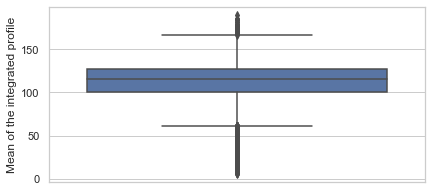

In [15]:
sns.boxplot(y='Mean of the integrated profile', data=data)

<AxesSubplot:ylabel='Excess kurtosis of the integrated profile'>

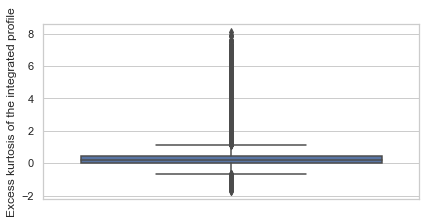

In [16]:
sns.boxplot(y='Excess kurtosis of the integrated profile', data=data)

<AxesSubplot:ylabel='Skewness of the integrated profile'>

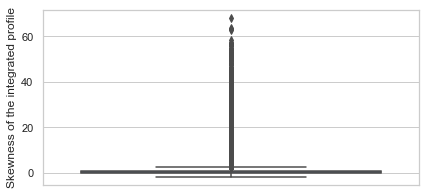

In [17]:
sns.boxplot(y='Skewness of the integrated profile', data=data)

<AxesSubplot:ylabel='Mean of the DM-SNR curve'>

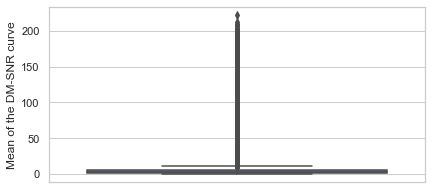

In [18]:
sns.boxplot(y='Mean of the DM-SNR curve', data=data)

<AxesSubplot:ylabel='Excess kurtosis of the DM-SNR curve'>

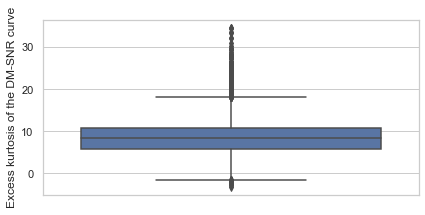

In [19]:
sns.boxplot(y='Excess kurtosis of the DM-SNR curve', data=data)

<AxesSubplot:ylabel='Skewness of the DM-SNR curve'>

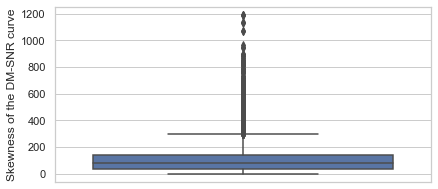

In [20]:
sns.boxplot(y='Skewness of the DM-SNR curve', data=data)

#### Гистограммы распределения данных

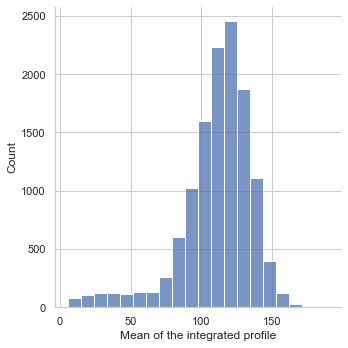

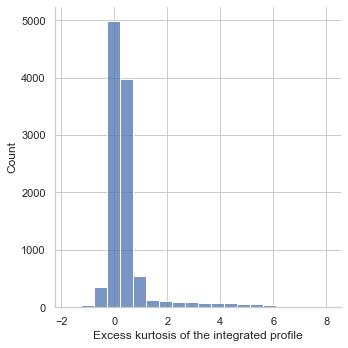

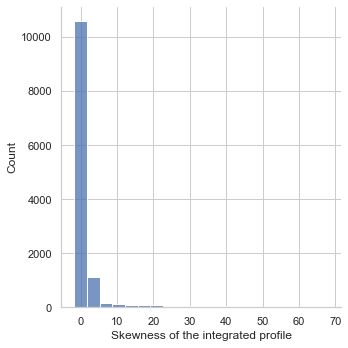

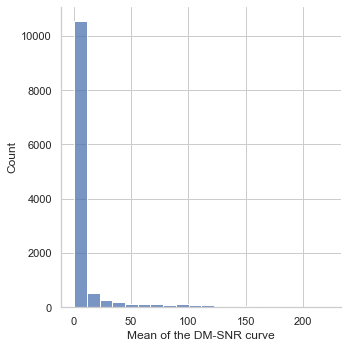

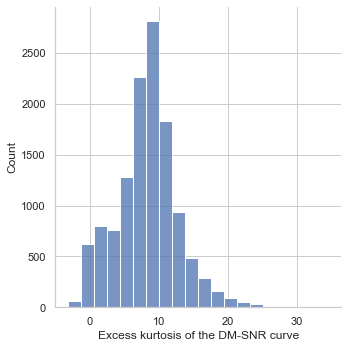

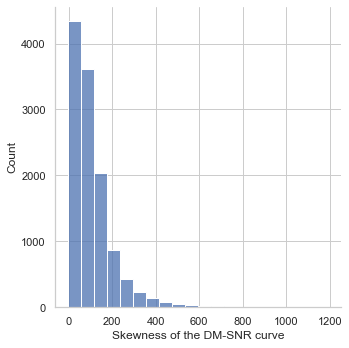

In [21]:
sns.displot(data=data, x='Mean of the integrated profile', kind='hist', bins=20)
sns.displot(data=data, x='Excess kurtosis of the integrated profile', kind='hist', bins=20)
sns.displot(data=data, x='Skewness of the integrated profile', kind='hist', bins=20)
sns.displot(data=data, x='Mean of the DM-SNR curve', kind='hist', bins=20)
sns.displot(data=data, x='Excess kurtosis of the DM-SNR curve', kind='hist', bins=20)
sns.displot(data=data, x='Skewness of the DM-SNR curve', kind='hist', bins=20)

#### Графики зависимости параметров

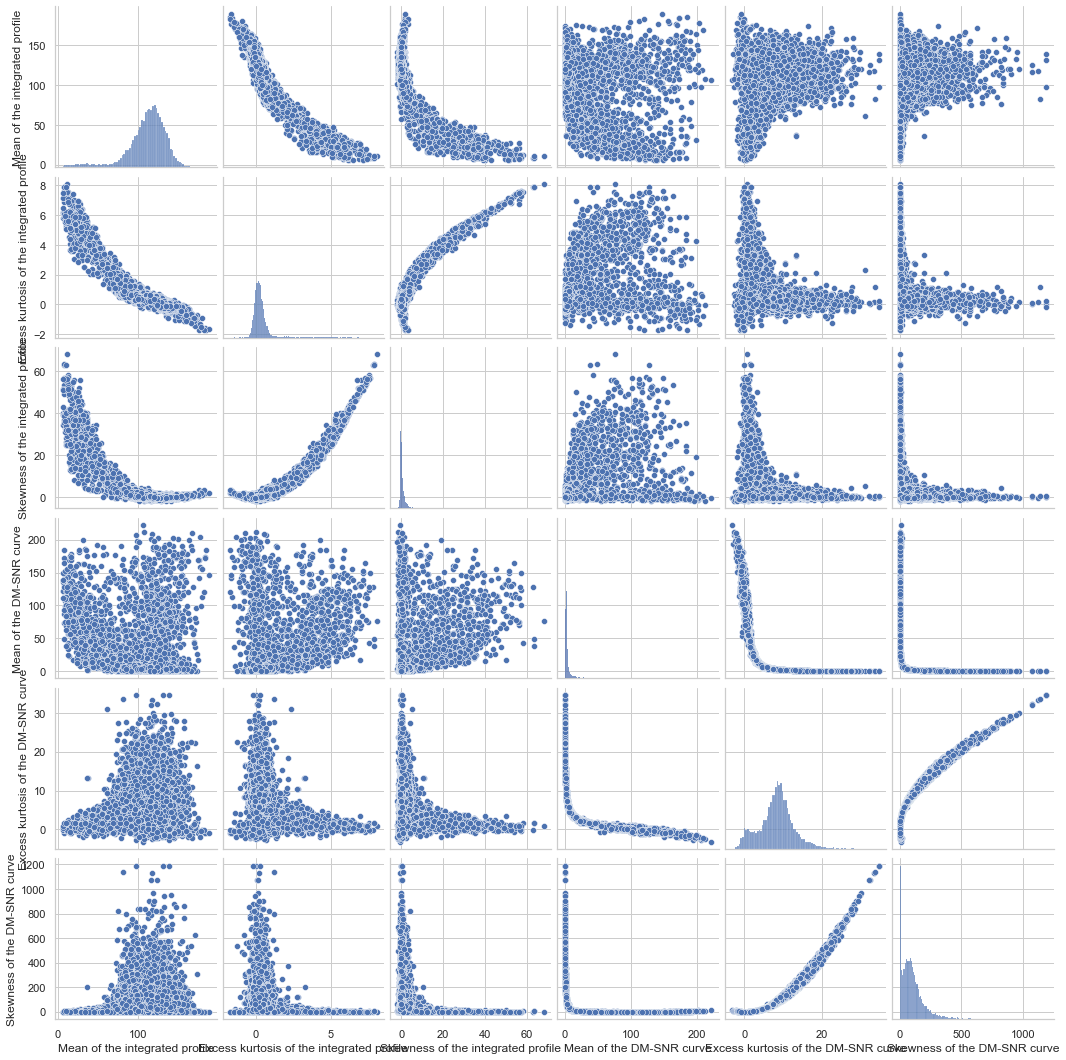

In [22]:
cols_to_plot = ['Mean of the integrated profile', 'Excess kurtosis of the integrated profile', 
                'Skewness of the integrated profile', 'Mean of the DM-SNR curve', 'Excess kurtosis of the DM-SNR curve', 
                'Skewness of the DM-SNR curve']
sns.pairplot(data[cols_to_plot][:200000])

#### 2. Определите матрицу признаков и переменную таргета. Разделите набор данных на тренировочный и тестовый с помощью train_test_split. Зафиксируйте размер тестовой выборки 0.2, а рэндом стэйт равный 0.

In [23]:
# Для построения матрицы признаков из таблицы удалим значения стандартных отклонений некоторых параметров.

parameter = data[['Mean of the integrated profile', 'Excess kurtosis of the integrated profile', 
                'Skewness of the integrated profile', 'Mean of the DM-SNR curve', 'Excess kurtosis of the DM-SNR curve', 
                'Skewness of the DM-SNR curve', 'target_class']]

In [24]:
parameter.head()

,Mean of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,0.375485,-0.013165,3.168896,7.449874,65.159298,0.0
1,76.968750,0.712898,3.388719,2.399666,9.414652,102.722975,0.0
2,130.585938,0.133408,-0.297242,2.743311,8.508364,74.031324,0.0
3,156.398438,-0.215989,-0.171294,17.471572,2.958066,7.197842,0.0
4,84.804688,0.825013,3.274125,2.790134,8.405008,76.291128,0.0


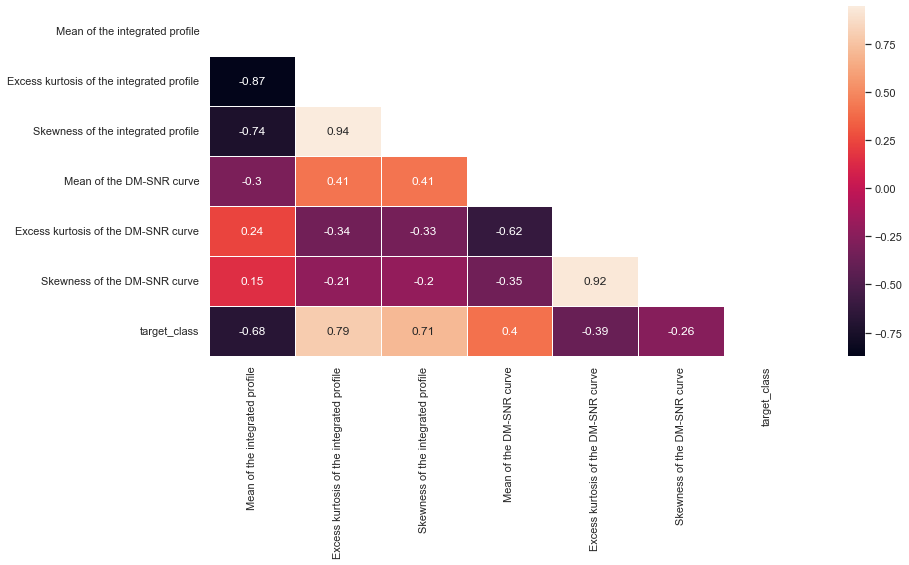

In [25]:
plt.figure(figsize=(12,6))
corr = parameter.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask, annot = True, fmt = '.2g', linewidths=1)
plt.show()

Наблюдение:

1. Высокая корреляция между параметрами Skewness и Excess kurtosis внутри групп integrated profile и DM-SNR curve;
2. Достаточно высокая зависимость между параметрами Excess kurtosis of the integrated profile, Skewness of the integrated profile и нашей целевой переменной target_class.

In [26]:
X = parameter.drop(['target_class'], axis=1)
y = parameter['target_class']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [28]:
X_train.shape, X_test.shape

((10022, 6), (2506, 6))

In [29]:
X_train.head()

,Mean of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
2390,139.695312,-0.213162,0.251980,5.748328,5.097661,29.108023
6313,89.507812,0.445968,1.559898,0.756689,18.139356,385.359516
1163,98.867188,0.415157,0.411022,1.485786,12.202016,147.752281
1269,131.648438,0.009662,0.085277,0.213211,34.539844,1191.000837
3964,100.429688,0.568687,0.504532,3.021739,8.098372,77.709686


In [30]:
X_train.isna().sum()

Mean of the integrated profile                  0
Excess kurtosis of the integrated profile    1406
Skewness of the integrated profile              0
Mean of the DM-SNR curve                        0
Excess kurtosis of the DM-SNR curve             0
Skewness of the DM-SNR curve                  522
dtype: int64

In [31]:
# Заменим пропущенные данные в обучающей выборке X_train средними значениями.

X_train = X_train.fillna({'Excess kurtosis of the integrated profile': X_train['Excess kurtosis of the integrated profile'].mean()})
X_train = X_train.fillna({'Skewness of the DM-SNR curve': X_train['Skewness of the DM-SNR curve'].mean()})

In [32]:
X_train.isna().sum()

Mean of the integrated profile               0
Excess kurtosis of the integrated profile    0
Skewness of the integrated profile           0
Mean of the DM-SNR curve                     0
Excess kurtosis of the DM-SNR curve          0
Skewness of the DM-SNR curve                 0
dtype: int64

#### 3. Используя StandartScaler отмасштабируйте матрицу признаков трейн и тест.

In [33]:
# Заменим пропущенные данные в тестовой выборке X_test средними значениями параметров из обучающей выборки X_train.

X_test.isna().sum()

Mean of the integrated profile                 0
Excess kurtosis of the integrated profile    329
Skewness of the integrated profile             0
Mean of the DM-SNR curve                       0
Excess kurtosis of the DM-SNR curve            0
Skewness of the DM-SNR curve                 103
dtype: int64

In [34]:
X_test = X_test.fillna({'Excess kurtosis of the integrated profile': X_train['Excess kurtosis of the integrated profile'].mean()})
X_test = X_test.fillna({'Skewness of the DM-SNR curve': X_train['Skewness of the DM-SNR curve'].mean()})

In [35]:
X_test.isna().sum()

Mean of the integrated profile               0
Excess kurtosis of the integrated profile    0
Skewness of the integrated profile           0
Mean of the DM-SNR curve                     0
Excess kurtosis of the DM-SNR curve          0
Skewness of the DM-SNR curve                 0
dtype: int64

In [36]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### 4. Обучите SVM Classifier на данных используя GridSearchCV: Попробуйте разные значения С, типа ядер, а так же значение гамма для rbf ядра. Подберите правильную метрику для оценки качества алгоритма. Убедитесь, что значения на тестровой и трейновой выборке сопоставимы и модель не переобучилась.

In [37]:
from sklearn.svm import SVC

model = SVC(kernel = 'rbf', class_weight='balanced')
model.fit(X_train,y_train)

SVC(class_weight='balanced')

In [38]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [10000, 100000, 1000000],
             'gamma': [0.0005, 0.001, 0.005]}

grid = GridSearchCV(model, param_grid)

%time grid.fit(X_train, y_train)

print(grid.best_params_)

CPU times: total: 5min 42s
Wall time: 5min 44s
{'C': 100000, 'gamma': 0.001}


In [39]:
model = grid.best_estimator_
y_pred = model.predict(X_test)

#### Сравнение точности обучающей и тестовой выборки

#### accuracy_score

In [40]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.9733


In [41]:
y_pred_train = model.predict(X_train)

In [42]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9695


#### precision

In [43]:
from sklearn.metrics import precision_score

print('Model accuracy score: {0:0.4f}'.format(precision_score(y_test, y_pred)))

Model accuracy score: 0.8291


In [44]:
print('Training-set accuracy score: {0:0.4f}'. format(precision_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8015


#### f1 score

In [45]:
from sklearn.metrics import f1_score

print('Model accuracy score: {0:0.4f}'.format(f1_score(y_test, y_pred)))

Model accuracy score: 0.8527


In [46]:
print('Training-set accuracy score: {0:0.4f}'. format(f1_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8447


#### recall

In [47]:
from sklearn.metrics import recall_score

print('Model accuracy score: {0:0.4f}'.format(recall_score(y_test, y_pred)))

Model accuracy score: 0.8778


In [48]:
print('Training-set accuracy score: {0:0.4f}'. format(recall_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8927


#### Проверка на переобучение и недообучение

In [49]:
print('Training set score: {0:0.4f}'. format(model.score(X_train, y_train)))
print('Test set score: {0:0.4f}'. format(model.score(X_test, y_test)))

Training set score: 0.9695
Test set score: 0.9733


#### 5. Постройте confusion_matrix и classification report.

In [50]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)
print('\nTrue Positive(TP) = ', cm[0,0])
print('\nTrue Negative(TN) = ', cm[1,1])
print('\nFalse Positive(FP) = ', cm[0,1])
print('\nFalse Negative(FN) = ', cm[1,0])

Confusion matrix

 [[2245   40]
 [  27  194]]

True Positive(TP) =  2245

True Negative(TN) =  194

False Positive(FP) =  40

False Negative(FN) =  27


In [51]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      2285
         1.0       0.83      0.88      0.85       221

    accuracy                           0.97      2506
   macro avg       0.91      0.93      0.92      2506
weighted avg       0.97      0.97      0.97      2506



#### 6. Обучите Decision tree classifier на тех же данных, используя GridSearchCV подберите гиперпараметры для модели. Используйте ту же метрику, что и в задаче с SVM. Убедитесь, что алгоритм не переобучился

In [52]:
R = parameter.drop(['target_class'], axis=1)
h = parameter['target_class']

In [53]:
R_train, R_test, h_train, h_test = train_test_split(R, h, test_size=0.2, random_state=0)

In [54]:
R_train = R_train.fillna({'Excess kurtosis of the integrated profile': R_train['Excess kurtosis of the integrated profile'].mean()})
R_train = R_train.fillna({'Skewness of the DM-SNR curve': R_train['Skewness of the DM-SNR curve'].mean()})

In [55]:
R_test = R_test.fillna({'Excess kurtosis of the integrated profile': R_train['Excess kurtosis of the integrated profile'].mean()})
R_test = R_test.fillna({'Skewness of the DM-SNR curve': R_train['Skewness of the DM-SNR curve'].mean()})

In [56]:
scaler = StandardScaler()
R_train = scaler.fit_transform(R_train)
R_test = scaler.transform(R_test)

#### Decision tree

In [57]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(R_train, h_train)

DecisionTreeClassifier()

In [58]:
param_tree = {'criterion': ['gini', 'entropy'],
             'max_depth': [4, 5, 6, 7, 8, 9, 10]}

grid_tree = GridSearchCV(tree, param_tree)

%time grid_tree.fit(R_train, h_train)
print(grid_tree.best_params_)

CPU times: total: 1.98 s
Wall time: 1.99 s
{'criterion': 'gini', 'max_depth': 5}


In [59]:
tree = grid_tree.best_estimator_
h_pred = tree.predict(R_test)

#### Сравнение точности обучающей и тестовой выборки

In [60]:
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(h_test, h_pred)))

Model accuracy score: 0.9761


In [61]:
h_pred_train = tree.predict(R_train)

In [62]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(h_train, h_pred_train)))

Training-set accuracy score: 0.9809


#### Проверка на переобучение и недообучение

In [63]:
print('Training set score: {0:0.4f}'. format(tree.score(R_train, h_train)))
print('Test set score: {0:0.4f}'. format(tree.score(R_test, h_test)))

Training set score: 0.9809
Test set score: 0.9761


#### 7. Постройте confusion_matrix и classification report.

In [64]:
matrix = confusion_matrix(h_test, h_pred)

print('Confusion matrix\n\n', cm)
print('\nTrue Positive(TP) = ', cm[0,0])
print('\nTrue Negative(TN) = ', cm[1,1])
print('\nFalse Positive(FP) = ', cm[0,1])
print('\nFalse Negative(FN) = ', cm[1,0])

Confusion matrix

 [[2245   40]
 [  27  194]]

True Positive(TP) =  2245

True Negative(TN) =  194

False Positive(FP) =  40

False Negative(FN) =  27


In [65]:
print(classification_report(h_test, h_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      2285
         1.0       0.92      0.80      0.86       221

    accuracy                           0.98      2506
   macro avg       0.95      0.90      0.92      2506
weighted avg       0.98      0.98      0.98      2506



#### 8. Напишите выводы по качеству моделей.

1. Обе модели получились достаточно точные;

2. Оценив точность моделей с помощью разных метрик, можно сказать, что модель decision tree по совокупности данных точнее:
- по метрикам accuracy score, precision и f1-score точность модели decision tree немного выше, чем CVM;
- по метрике recall точность модели decision tree немного уступает CVM;
3. По Confusion matrix обе модели дали похожие результаты.